## tes 2 MultiVariat

In [26]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import seaborn as sns


## Data aqusition

In [27]:

# Download stock data
# ticker = "AAPL"  # Replace with your desired stock ticker
# ticker = "000001.SS"  # Replace with your desired stock ticker
ticker = "NVDA"  
data = yf.download(ticker, start="2014-01-01", end="2024-01-01")
data = data[["High", "Low", "Open", "Close"]]


[*********************100%***********************]  1 of 1 completed


## Exploratory Data Analysis (EDA)

In [28]:
data.head()

,High,Low,Open,Close
Date,,,,
2014-01-02,0.3995,0.39300,0.39800,0.39650
2014-01-03,0.3980,0.39050,0.39725,0.39175
2014-01-06,0.4000,0.39200,0.39575,0.39700
2014-01-07,0.4050,0.39825,0.40100,0.40350
2014-01-08,0.4110,0.40350,0.40500,0.40900


In [29]:
# data.to_csv('NVDA stock.csv')

In [30]:
data.isnull().sum()

High     0
Low      0
Open     0
Close    0
dtype: int64

### Data Description

In [31]:
print("Statistical Summary:\n", data.describe())

Statistical Summary:
               High          Low         Open        Close
count  2516.000000  2516.000000  2516.000000  2516.000000
mean     10.242784     9.873921    10.061804    10.066768
std      11.994553    11.573957    11.792418    11.791845
min       0.388000     0.383000     0.385750     0.384000
25%       1.198000     1.179687     1.189375     1.188938
50%       5.297250     5.126500     5.237500     5.230125
75%      14.858062    14.228500    14.572750    14.572000
max      50.548000    49.411999    50.216000    50.409000


### Line Plotting

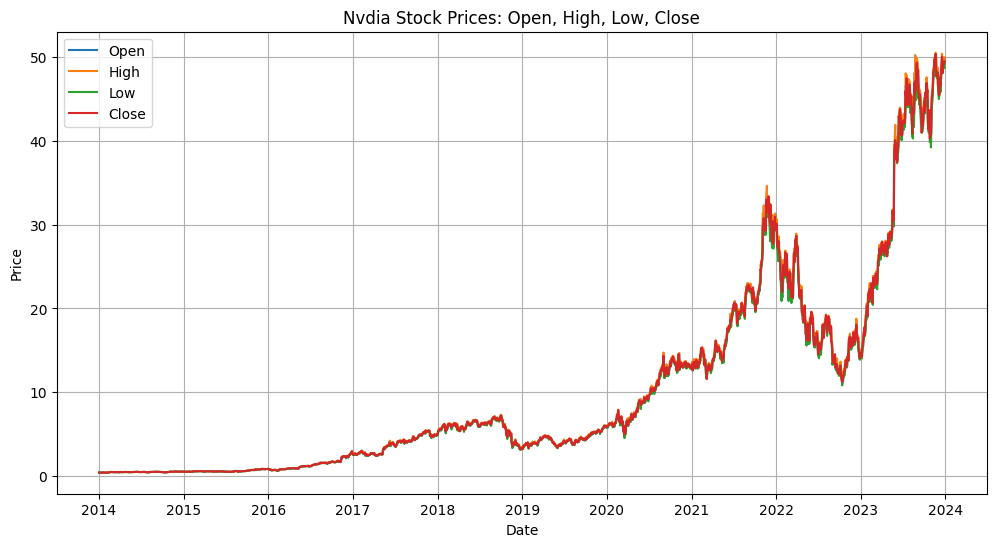

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label='Open')
plt.plot(data['High'], label='High')
plt.plot(data['Low'], label='Low')
plt.plot(data['Close'], label='Close')
plt.title('Nvdia Stock Prices: Open, High, Low, Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Price Range (High - Low) Distribution

C:\Users\ovisa\AppData\Local\Temp\ipykernel_40736\1524853951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Range'] = data['High'] - data['Low']


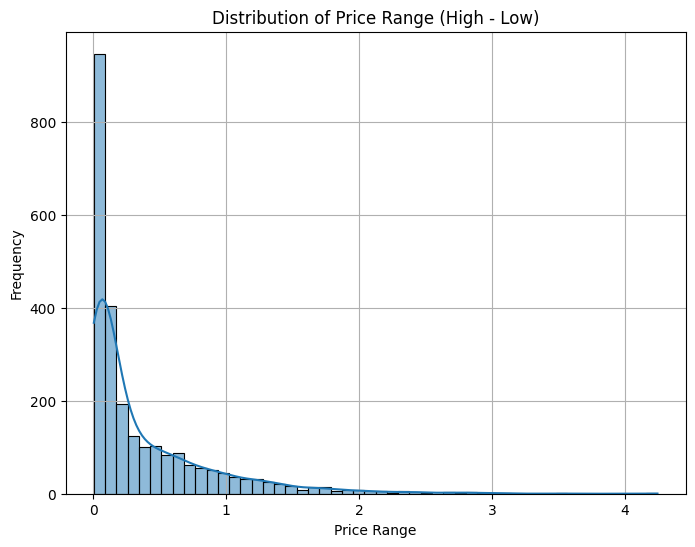

In [33]:
data['Price Range'] = data['High'] - data['Low']
plt.figure(figsize=(8, 6))
sns.histplot(data['Price Range'], bins=50, kde=True)
plt.title('Distribution of Price Range (High - Low)')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Correlation matrix

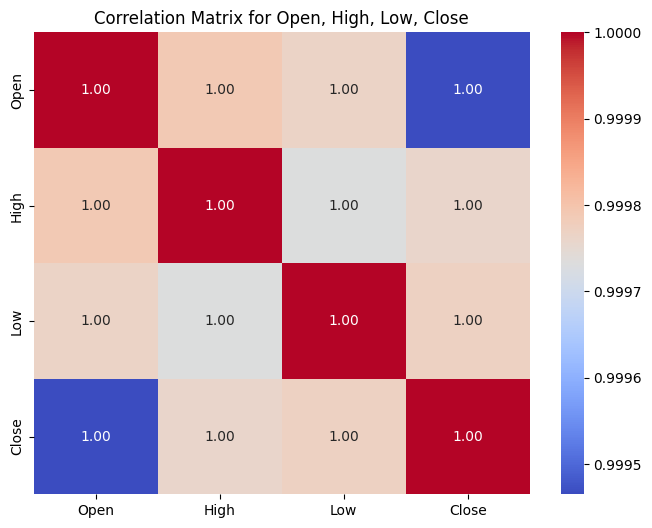

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Open, High, Low, Close')
plt.show()

## outliers handling

In [35]:
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

outliers = detect_outliers_iqr(data)
print(outliers.sum())  # Count of outliers per column

High           151
Low            151
Open           151
Close          151
Price Range    162
dtype: int64


In [36]:
# # data_smooth = data.rolling(window=5).mean()
# data = data.rolling(window=5).mean()

# # Plot the smoothed data
# plt.figure(figsize=(10, 6))
# plt.plot(data['High'], label="High (Smoothed)")
# plt.plot(data['Low'], label="Low (Smoothed)")
# plt.plot(data['Open'], label="Open (Smoothed)")
# plt.plot(data['Close'], label="Close (Smoothed)")
# plt.title(f"Smoothed Stock Price Data for {ticker}")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.legend()
# plt.show()


In [37]:
data.info

<bound method DataFrame.info of                  High        Low       Open      Close  Price Range
Date                                                               
2014-01-02   0.399500   0.393000   0.398000   0.396500     0.006500
2014-01-03   0.398000   0.390500   0.397250   0.391750     0.007500
2014-01-06   0.400000   0.392000   0.395750   0.397000     0.008000
2014-01-07   0.405000   0.398250   0.401000   0.403500     0.006750
2014-01-08   0.411000   0.403500   0.405000   0.409000     0.007500
...               ...        ...        ...        ...          ...
2023-12-22  49.382999  48.466999  49.195000  48.830002     0.916000
2023-12-26  49.599998  48.959999  48.967999  49.278999     0.639999
2023-12-27  49.680000  49.084999  49.511002  49.417000     0.595001
2023-12-28  49.883999  49.411999  49.643002  49.521999     0.472000
2023-12-29  49.997002  48.750999  49.813000  49.521999     1.246002

[2516 rows x 5 columns]>

In [38]:
scaler = MinMaxScaler()
# data[["High", "Low", "Open", "Close"]] = scaler.fit_transform(data[["High", "Low", "Open", "Close"]])
data[["High", "Low", "Open", "Close"]] = scaler.fit_transform(data[["High", "Low", "Open", "Close"]])

C:\Users\ovisa\AppData\Local\Temp\ipykernel_40736\3271500480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["High", "Low", "Open", "Close"]] = scaler.fit_transform(data[["High", "Low", "Open", "Close"]])


In [39]:
# Create sequences for time series forecasting
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0:3]
        X.append(a)
        Y.append(dataset[i + look_back, 3])
    return np.array(X), np.array(Y)

In [40]:
look_back = 60
X, Y = create_dataset(data.values, look_back)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
# Build the model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, strides=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=50))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))
model.add(Dense(units=1))
model.add(Dense(units=1))

c:\Users\ovisa\anaconda3\envs\env1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0176 - val_loss: 6.9478e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.3844e-04 - val_loss: 4.0675e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.2549e-04 - val_loss: 3.4366e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.4337e-04 - val_loss: 3.0908e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.9183e-04 - val_loss: 3.6167e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.8586e-04 - val_loss: 4.9400e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.7704e-04 - val_loss: 2.7504e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.0866e-04 - val_loss: 2.9203e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.5595e-04 - val_loss: 2.5723e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.9614e-04 - val_loss: 2.1610e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.5775e-04 - 

In [43]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [44]:
# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(np.concatenate((np.zeros((len(train_predict), 3)), train_predict), axis=1))[:, -1]
Y_train = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_train), 3)), np.expand_dims(Y_train, axis=1)), axis=1))[:, -1]
test_predict = scaler.inverse_transform(np.concatenate((np.zeros((len(test_predict), 3)), test_predict), axis=1))[:, -1]
Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), 3)), np.expand_dims(Y_test, axis=1)), axis=1))[:, -1]

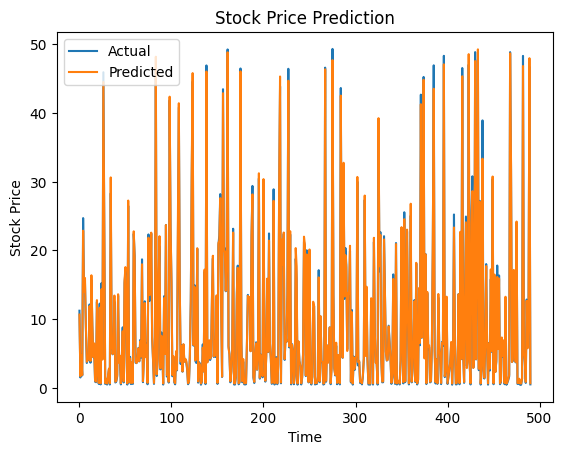

In [45]:
# Plot the results
plt.plot(Y_test, label="Actual")
plt.plot(test_predict, label="Predicted")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [46]:
# prompt: evaluation metrics including r2

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
mae = mean_absolute_error(Y_test, test_predict)
r2 = r2_score(Y_test, test_predict)
mape = mean_absolute_percentage_error(Y_test, test_predict)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")

RMSE: 0.6026360230360205
MAE: 0.3505176654518458
MAPE: 0.0908479391709653
R-squared: 0.997302900298692


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\ovisa\anaconda3\envs\env1\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


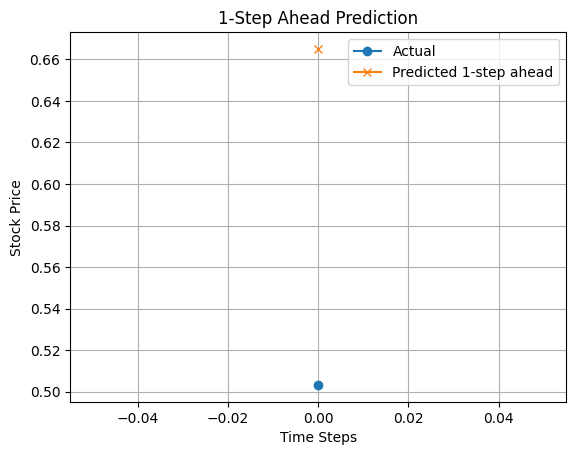

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


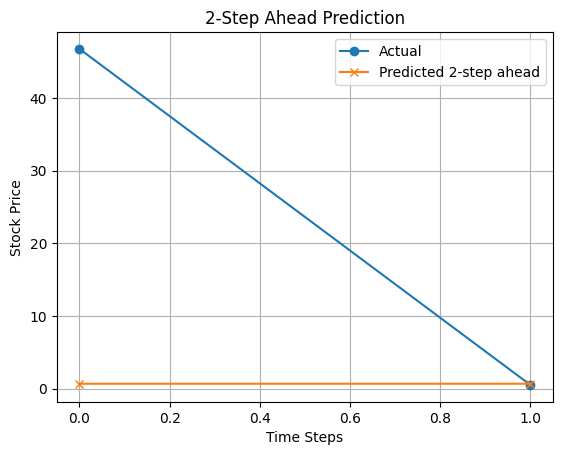

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


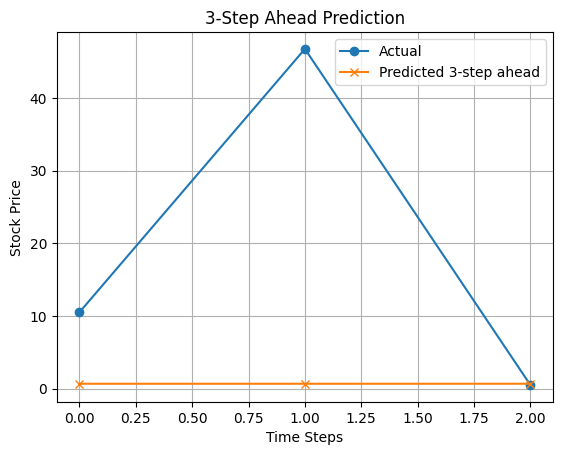

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


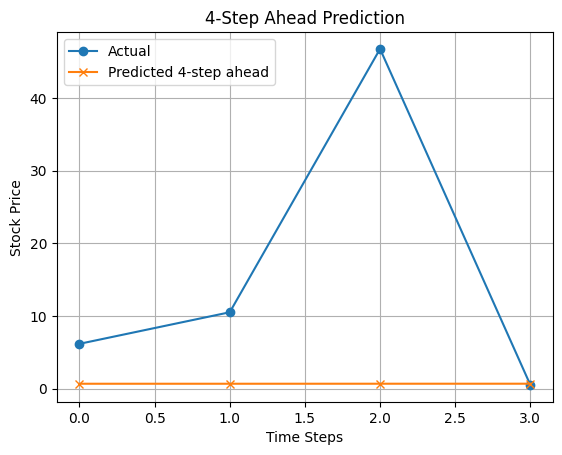

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


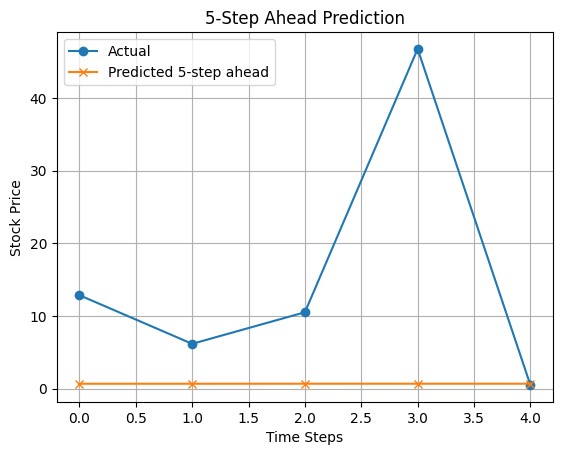

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


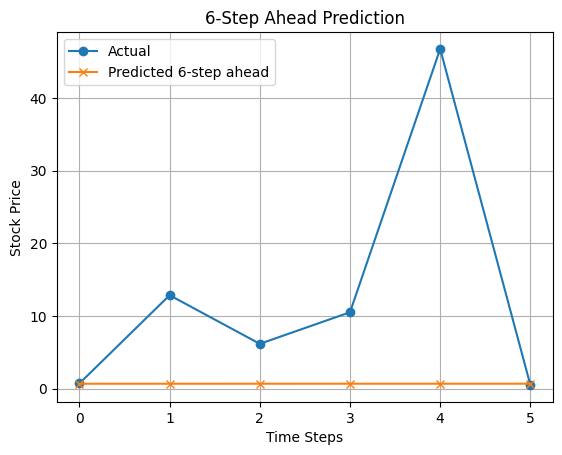

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


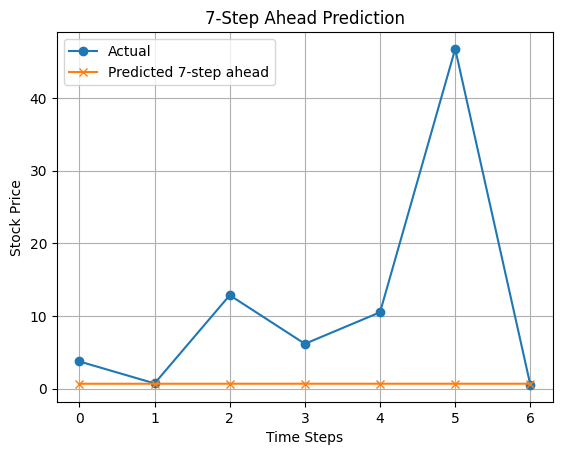

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


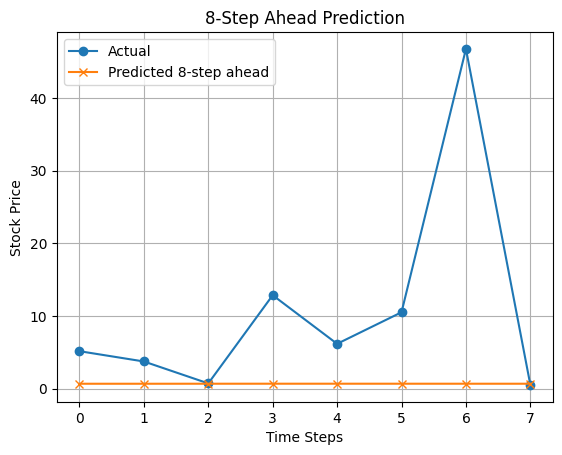

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


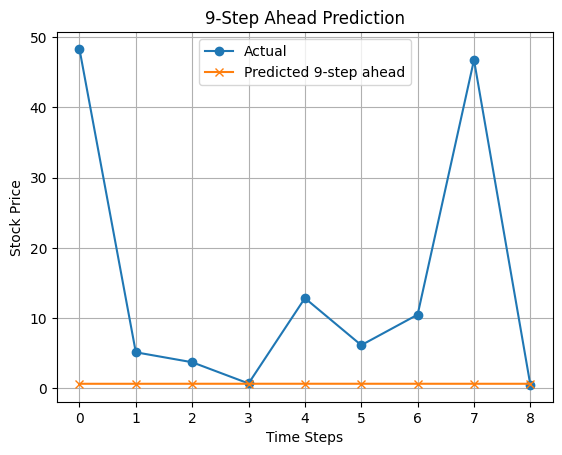

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


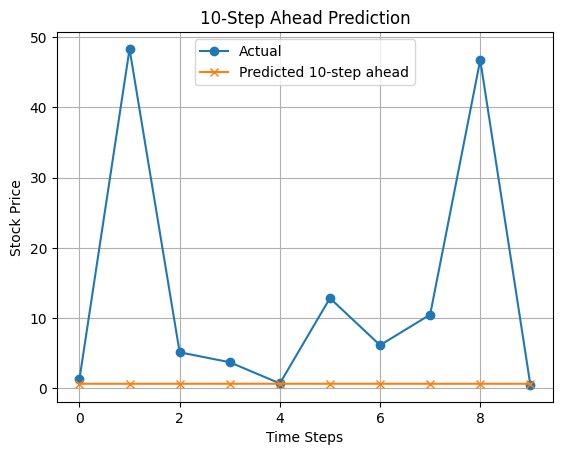

Metrics for 1-step ahead prediction:
RMSE: 0.1617766124991945
MAE: 0.1617766124991945
MAPE: 0.32146370905013305
R-squared: nan
-----------------------------
Metrics for 2-step ahead prediction:
RMSE: 32.60134130252495
MAE: 23.133567804786495
MAPE: 0.6540049793192066
R-squared: -0.9860625962749072
-----------------------------
Metrics for 3-step ahead prediction:
RMSE: 27.218646164928955
MAE: 18.704485820295957
MAPE: 0.7500507931781857
R-squared: -0.8752716646981409
-----------------------------
Metrics for 4-step ahead prediction:
RMSE: 23.730398799640852
MAE: 15.402446878967474
MAPE: 0.7865170306119553
R-squared: -0.7144231668506553
-----------------------------
Metrics for 5-step ahead prediction:
RMSE: 21.913041785172943
MAE: 14.75917772857072
MAPE: 0.8188832811386157
R-squared: -0.8165193331110876
-----------------------------
Metrics for 6-step ahead prediction:
RMSE: 20.003374192017777
MAE: 12.305916269887973
MAPE: 0.6926935352910615
R-squared: -0.5999718168352903
---------------

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def multi_step_prediction(model, X_last_sequence, n_steps):
    predictions = []
    
    # Loop to predict n steps ahead
    for _ in range(n_steps):
        # Predict the next value
        next_pred = model.predict(X_last_sequence[np.newaxis, :, :])[0][0]
        predictions.append(next_pred)
        
        # Shift the input sequence left by one time step and append the new prediction
        X_last_sequence = np.roll(X_last_sequence, -1, axis=0)
        X_last_sequence[-1, -1] = next_pred  # Replace the last value with the prediction
    
    return np.array(predictions)

# Reverse scaling for inverse transformation
def inverse_transform(predictions, scaler):
    predictions_scaled = np.concatenate((np.zeros((len(predictions), 3)), np.expand_dims(predictions, axis=1)), axis=1)
    return scaler.inverse_transform(predictions_scaled)[:, -1]

# Number of steps to predict
n_steps_list = [1,2,3,4,5,6,7,8,9,10]

# Prepare last sequence from test data for multi-step prediction
X_last_sequence = X_test[-1]

# Dictionary to store metrics for each step size
metrics = {}

# Perform predictions and evaluate metrics for each step size
for n_steps in n_steps_list:
    # Generate multi-step predictions
    predicted_steps = multi_step_prediction(model, X_last_sequence, n_steps)
    
    # Inverse transform the predictions to the original scale
    predicted_steps_inversed = inverse_transform(predicted_steps, scaler)
    
    # For comparison, take the actual Y_test values for the next n_steps
    actual_steps = Y_test[-n_steps:]
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(actual_steps, predicted_steps_inversed))
    mae = mean_absolute_error(actual_steps, predicted_steps_inversed)
    mape = mean_absolute_percentage_error(actual_steps, predicted_steps_inversed)
    r2 = r2_score(actual_steps, predicted_steps_inversed)
    
    # Store metrics in dictionary
    metrics[n_steps] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R-squared': r2
    }
    
    # Plot the results
    plt.figure()
    plt.plot(actual_steps, label="Actual", marker='o')
    plt.plot(predicted_steps_inversed, label=f"Predicted {n_steps}-step ahead", marker='x')
    plt.title(f"{n_steps}-Step Ahead Prediction")
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Print the evaluation metrics for each step size
for n_steps, metric_values in metrics.items():
    print(f"Metrics for {n_steps}-step ahead prediction:")
    print(f"RMSE: {metric_values['RMSE']}")
    print(f"MAE: {metric_values['MAE']}")
    print(f"MAPE: {metric_values['MAPE']}")
    print(f"R-squared: {metric_values['R-squared']}")
    print("-----------------------------")
